In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [3]:
in_dir = 'data/'
in_file = 'ex6_ImagData2Load.mat'
data = sio.loadmat(in_dir + in_file)
ImgT1 = data['ImgT1']
ImgT2 = data['ImgT2']
ROI_GM = data['ROI_GM']
ROI_WM = data['ROI_WM']

### Exercise 1
Display both the T1 and T2 images, their 1 and 2D histograms and scatter plots.

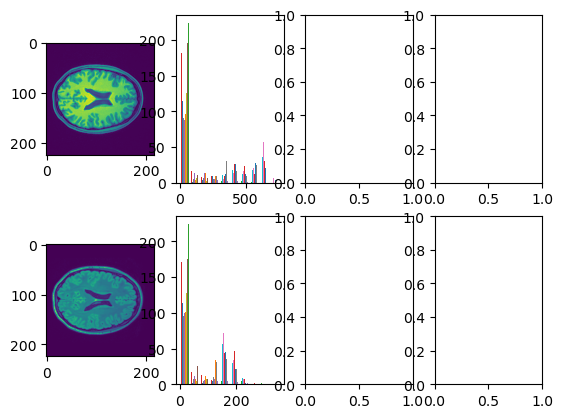

In [44]:
fig, axs = plt.subplots(2, 4)
axs[0, 0].imshow(ImgT1)
axs[0, 1].hist(ImgT1)
# axs[0, 1].hist(ImgT1)
# axs[0, 1].scatter(ImgT1)
axs[1, 0].imshow(ImgT2)
axs[1, 1].hist(ImgT2)
# axs[1, 1].hist(ImgT2)
# axs[1, 1].scatter(ImgT2)
plt.show()

### Exercise 2
Place trainings examples i.e. ROI_WM and ROI_GM into variables C1 and C2 representing class 1 and class 2 respectively.

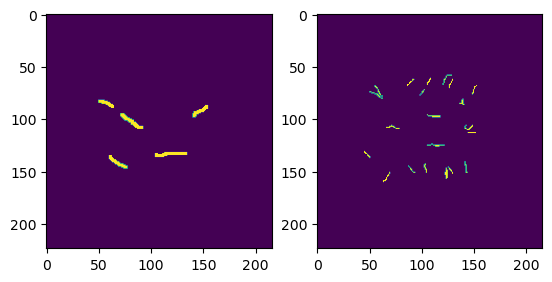

In [17]:
C1 = ROI_WM.copy()
C2 = ROI_GM.copy()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(C1)
axs[1].imshow(C2)
plt.show()

### Exercise 3
For each binary training ROI find the corresponding training examples in ImgT1 and ImgT2.

In [19]:
qC1 = np.argwhere(C1)
qC2 = np.argwhere(C2)

In [61]:
len(qC1)

399

### Exercise 4
Make a training data vector (X) and target class vector (T) as input for the LDA() function. T and X should have the same length of data points.

In [72]:
X1 = [ImgT1[qc1[0]][qc1[1]] for qc1 in qC1]
X1 += [ImgT1[qc2[0]][qc2[1]] for qc2 in qC2]
X2 = [ImgT2[qc1[0]][qc1[1]] for qc1 in qC1]
X2 += [ImgT2[qc2[0]][qc2[1]] for qc2 in qC2]
X = np.array([X1, X2]).T

T = np.array([0]*len(qC1) + [1]*len(qC2))

print(X.shape)
print(T.shape)

(679, 2)
(679,)


### Exercise 6
Train the linear discriminant classifier using the Fisher discriminant function and estimate the weight-vector coefficient W for classification given X and T.

In [77]:
import sys

sys.path.insert(0, '/data/')

from data.LDA import LDA
W = LDA(X,T)

### Exercise 7
Apply the linear discriminant classifier i.e. perform multi-modal classification using the trained weight-vector W for each class.

In [78]:
Xall= np.c_[ImgT1.ravel(), ImgT2.ravel()]
Y = np.c_[np.ones((len(Xall), 1)), Xall] @ W.T

### Exercise 8
Perform multi-modal classification: Calculate the posterior probability i.e. $P(X|C_1)$ of a data point belonging to class 1

In [88]:
PosteriorProb_C1 = np.clip(np.exp(Y) / np.sum(np.exp(Y),1)[:, np.newaxis], 0, 1)
PosteriorProb_C1

array([[0.00159784, 0.99840216],
       [0.00159784, 0.99840216],
       [0.00142215, 0.99857785],
       ...,
       [0.00159784, 0.99840216],
       [0.00159784, 0.99840216],
       [0.00112652, 0.99887348]])

### Exercise 9
Apply segmentation: Find all voxles in the T1w and T2w image with $P(X|C_1)>0.5$ as belonging to Class 1